In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("Airlines_dataset.csv")

In [9]:
df.head()

,FlightID,Airline,FlightNumber,Origin,Destination,ScheduledDeparture,ActualDeparture,ScheduledArrival,ActualArrival,DelayMinutes,DelayReason,Cancelled,Diverted,AircraftType,TailNumber,Distance,Month,DayOfWeek,Hour,Route
0,1,United,4558,ORD,MIA,08:11:00,2024-09-01 08:30:00,2024-09-01 12:11:00,2024-09-01 12:19:00,8,Weather,True,False,Boeing 737,N71066,1031,9,Sunday,8,ORD-MIA
1,2,Delta,8021,LAX,MIA,10:25:00,2024-09-01 10:41:00,2024-09-01 13:25:00,2024-09-01 13:27:00,2,Air Traffic Control,True,True,Airbus A320,N22657,1006,9,Sunday,10,LAX-MIA
2,3,Southwest,7520,DFW,SFO,16:53:00,2024-09-01 17:05:00,2024-09-01 17:53:00,2024-09-01 18:07:00,14,Weather,True,True,Boeing 737,N95611,2980,9,Sunday,16,DFW-SFO
3,4,Delta,2046,ORD,BOS,14:44:00,2024-09-01 15:04:00,2024-09-01 18:44:00,2024-09-01 18:34:00,-10,Air Traffic Control,False,False,Boeing 777,N90029,1408,9,Sunday,14,ORD-BOS
4,5,Delta,6049,LAX,SEA,01:51:00,2024-09-01 02:08:00,2024-09-01 05:51:00,2024-09-01 06:15:00,24,Air Traffic Control,False,True,Boeing 737,N27417,2298,9,Sunday,1,LAX-SEA


## <span style="color:PURPLE">UNIVARIATE ANALYSIS AND BIVARIATE ANALYSIS</span>

<Axes: xlabel='Airline'>

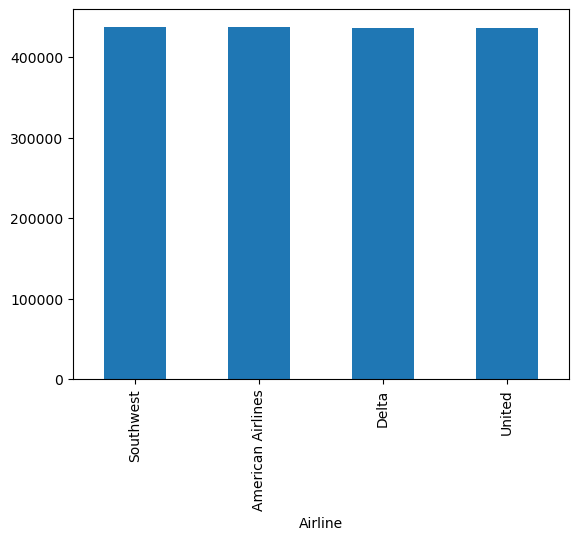

In [10]:
airline_counts = df['Airline'].value_counts().head(10)
airline_counts.plot(kind='bar')

In [16]:
route_counts = df['Route'].value_counts().head(3)
route_counts.head(3)

Route
ORD-JFK    70272
JFK-MIA    70237
ATL-MIA    70205
Name: count, dtype: int64

<Axes: xlabel='Month'>

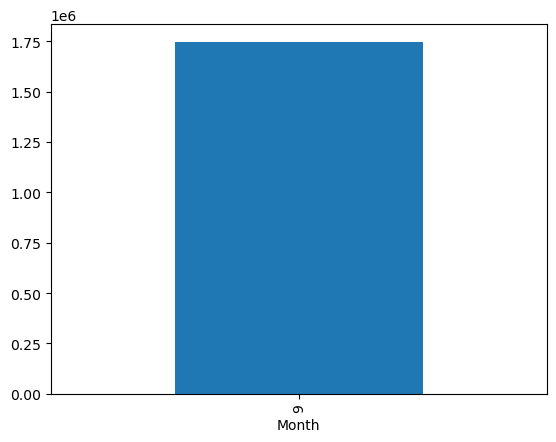

In [18]:
#Busiest Months
monthly_flights = df['Month'].value_counts().sort_index()
monthly_flights.plot(kind='bar')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

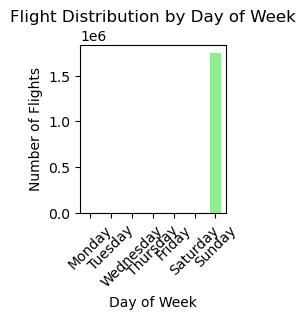

In [20]:
#Day of Week Distribution
# Define day order first
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Then run your visualization
plt.subplot(2, 3, 4)
day_counts = df['DayOfWeek'].value_counts().reindex(day_order)
day_counts.plot(kind='bar', color='lightgreen', ax=plt.gca())
plt.title('Flight Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)


WEEK 3: Flight Patterns Analysis


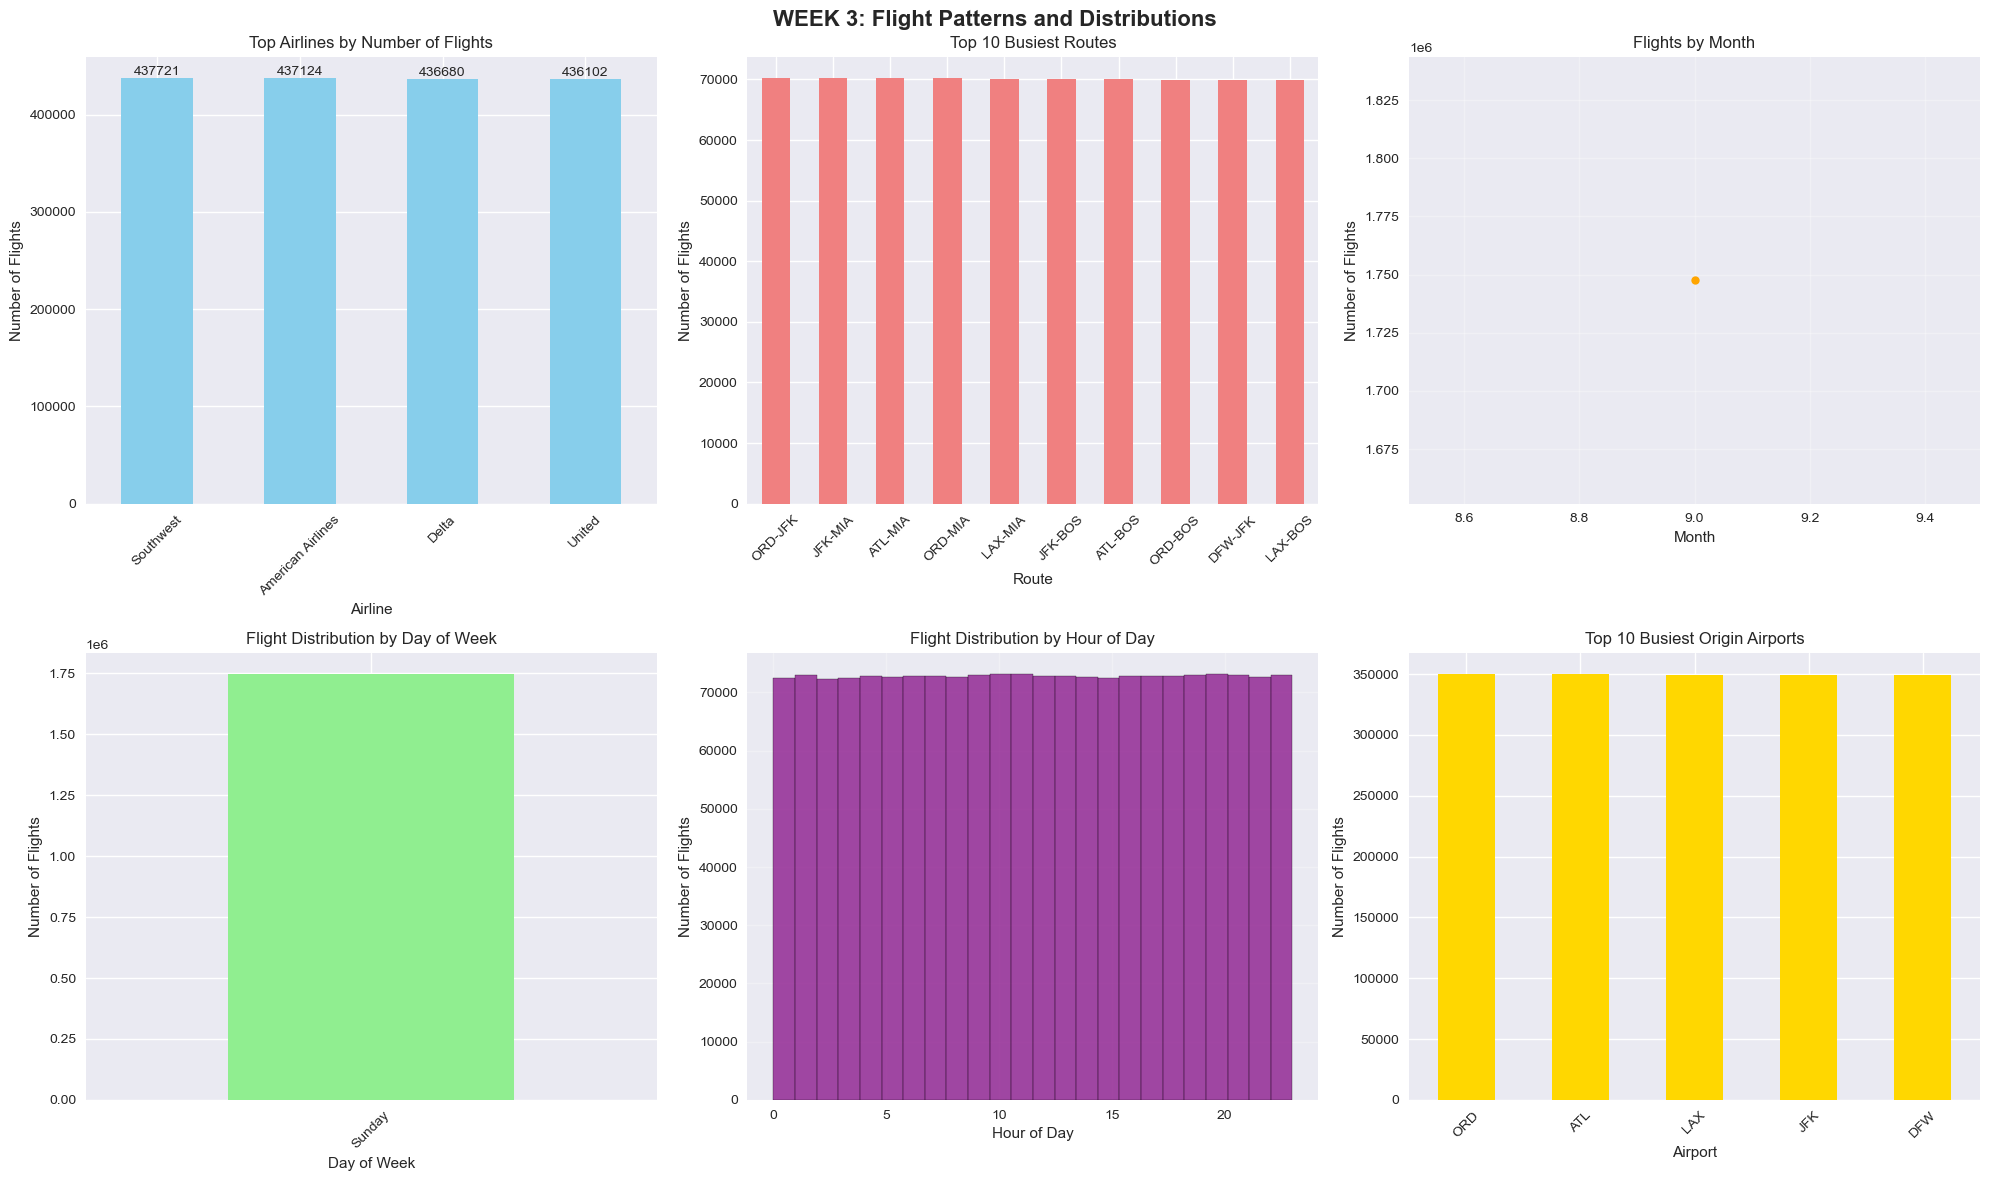

In [31]:

print("\n" + "="*60)
print("WEEK 3: Flight Patterns Analysis")
print("="*60)

# Create Week 3 visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('WEEK 3: Flight Patterns and Distributions', fontsize=16, fontweight='bold')

# 1. Top Airlines by number of flights
plt.subplot(2, 3, 1)
airline_counts = df['Airline'].value_counts()
airline_counts.plot(kind='bar', color='skyblue')
plt.title('Top Airlines by Number of Flights')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(airline_counts):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom')

# 2. Top Routes
plt.subplot(2, 3, 2)
route_counts = df['Route'].value_counts().head(10)
route_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Busiest Routes')
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)

# 3. Busiest Months
plt.subplot(2, 3, 3)
monthly_flights = df['Month'].value_counts().sort_index()
monthly_flights.plot(kind='line', marker='o', color='orange', linewidth=2, markersize=6)
plt.title('Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.grid(True, alpha=0.3)

# 4. Flight Distribution by Day of Week
plt.subplot(2, 3, 4)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['DayOfWeek'].value_counts()
# Reorder to match logical day sequence
day_counts = day_counts.reindex([day for day in day_order if day in day_counts.index])
day_counts.plot(kind='bar', color='lightgreen')
plt.title('Flight Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)

# 5. Flight Distribution by Time of Day
plt.subplot(2, 3, 5)
plt.hist(df['Hour'], bins=24, color='purple', alpha=0.7, edgecolor='black')
plt.title('Flight Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.grid(True, alpha=0.3)

# 6. Busiest Airports (Origin)
plt.subplot(2, 3, 6)
origin_counts = df['Origin'].value_counts().head(10)
origin_counts.plot(kind='bar', color='gold')
plt.title('Top 10 Busiest Origin Airports')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ORD-JFK'),
  Text(1, 0, 'JFK-MIA'),
  Text(2, 0, 'ATL-MIA'),
  Text(3, 0, 'ORD-MIA'),
  Text(4, 0, 'LAX-MIA'),
  Text(5, 0, 'JFK-BOS'),
  Text(6, 0, 'ATL-BOS'),
  Text(7, 0, 'ORD-BOS'),
  Text(8, 0, 'DFW-JFK'),
  Text(9, 0, 'LAX-BOS')])

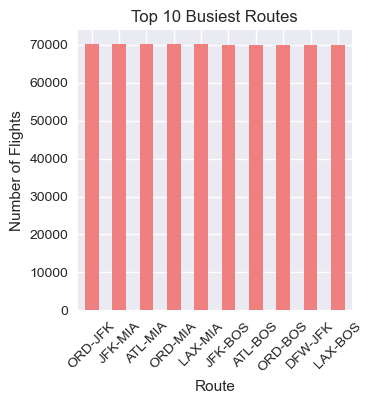

In [32]:
# 2. Top Routes
plt.subplot(2, 3, 2)
route_counts = df['Route'].value_counts().head(10)
route_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Busiest Routes')
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)

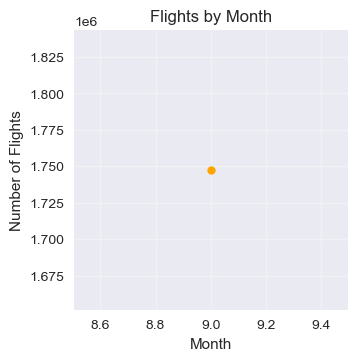

In [33]:
# 3. Busiest Months
plt.subplot(2, 3, 3)
monthly_flights = df['Month'].value_counts().sort_index()
monthly_flights.plot(kind='line', marker='o', color='orange', linewidth=2, markersize=6)
plt.title('Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.grid(True, alpha=0.3)

(array([0]), [Text(0, 0, 'Sunday')])

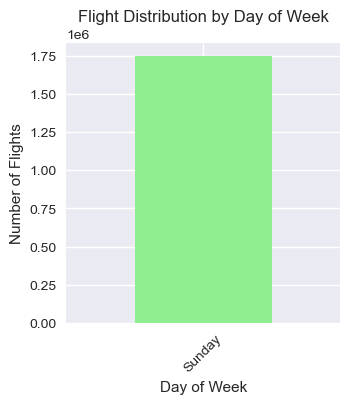

In [34]:
# 4. Flight Distribution by Day of Week
plt.subplot(2, 3, 4)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['DayOfWeek'].value_counts()
# Reorder to match logical day sequence
day_counts = day_counts.reindex([day for day in day_order if day in day_counts.index])
day_counts.plot(kind='bar', color='lightgreen')
plt.title('Flight Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)

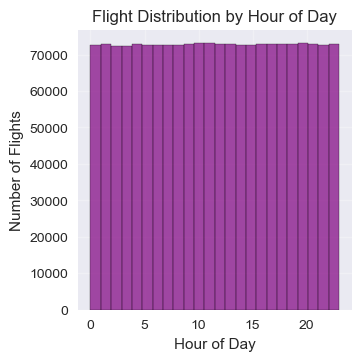

In [35]:

# 5. Flight Distribution by Time of Day
plt.subplot(2, 3, 5)
plt.hist(df['Hour'], bins=24, color='purple', alpha=0.7, edgecolor='black')
plt.title('Flight Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.grid(True, alpha=0.3)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'ORD'),
  Text(1, 0, 'ATL'),
  Text(2, 0, 'LAX'),
  Text(3, 0, 'JFK'),
  Text(4, 0, 'DFW')])

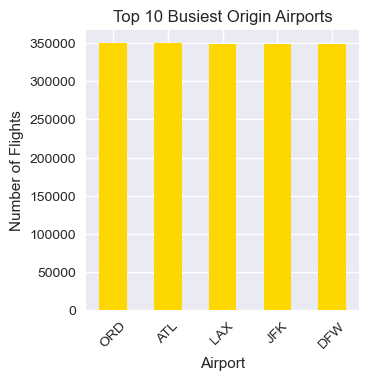

In [36]:
# 6. Busiest Airports (Origin)
plt.subplot(2, 3, 6)
origin_counts = df['Origin'].value_counts().head(10)
origin_counts.plot(kind='bar', color='gold')
plt.title('Top 10 Busiest Origin Airports')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)


WEEK 4: Delay Analysis


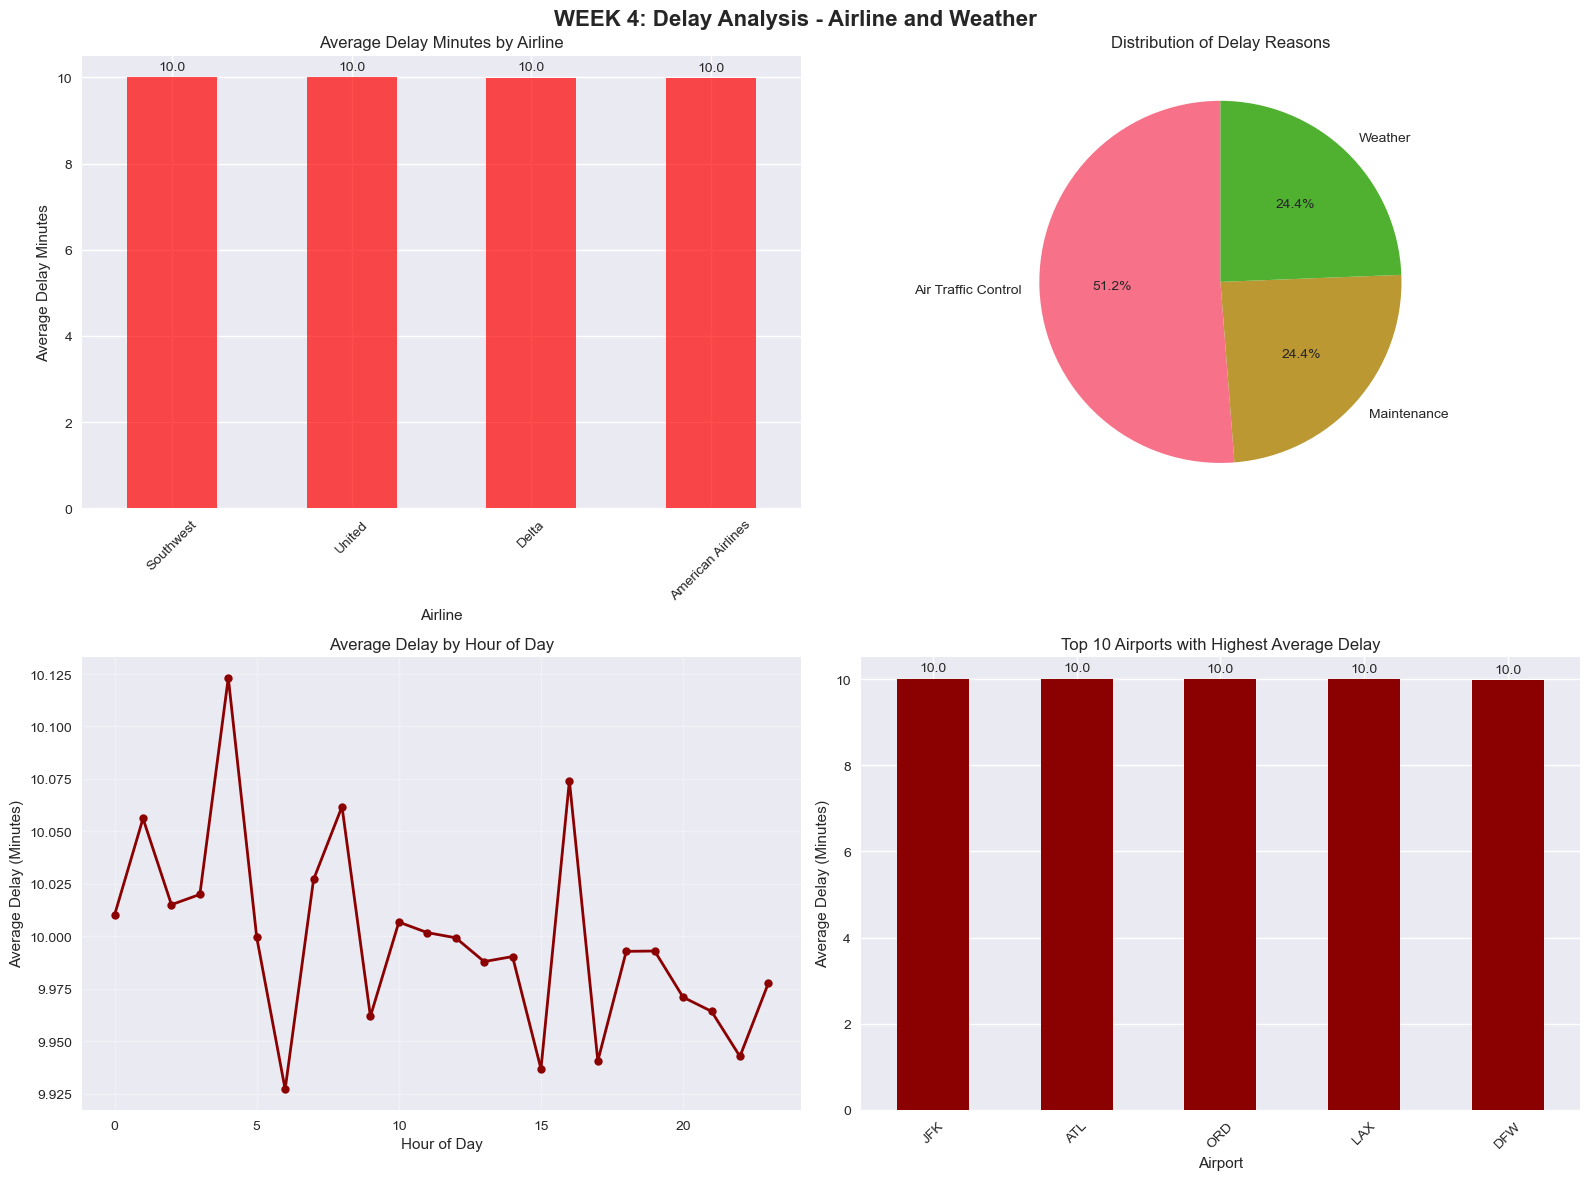

In [29]:
# =============================================================================
# WEEK 4: Delay Analysis – Airline and Weather
# =============================================================================

print("\n" + "="*60)
print("WEEK 4: Delay Analysis")
print("="*60)

# Create Week 4 visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('WEEK 4: Delay Analysis - Airline and Weather', fontsize=16, fontweight='bold')

# 7. Average Delay by Airline
plt.subplot(2, 2, 1)
delay_by_airline = df.groupby('Airline')['DelayMinutes'].mean().sort_values(ascending=False)
delay_by_airline.plot(kind='bar', color='red', alpha=0.7)
plt.title('Average Delay Minutes by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay Minutes')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(delay_by_airline):
    plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom')

# 8. Delay Reasons Distribution
plt.subplot(2, 2, 2)
delay_reasons = df['DelayReason'].value_counts()
delay_reasons.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Delay Reasons')
plt.ylabel('')

# 9. Delays by Time of Day
plt.subplot(2, 2, 3)
delays_by_hour = df.groupby('Hour')['DelayMinutes'].mean()
delays_by_hour.plot(kind='line', marker='o', color='darkred', linewidth=2, markersize=6)
plt.title('Average Delay by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (Minutes)')
plt.grid(True, alpha=0.3)

# 10. Delays by Airport (Origin)
plt.subplot(2, 2, 4)
delays_by_airport = df.groupby('Origin')['DelayMinutes'].mean().sort_values(ascending=False).head(10)
delays_by_airport.plot(kind='bar', color='darkred')
plt.title('Top 10 Airports with Highest Average Delay')
plt.xlabel('Airport')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(delays_by_airport):
    plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Southwest'),
  Text(1, 0, 'United'),
  Text(2, 0, 'Delta'),
  Text(3, 0, 'American Airlines')])

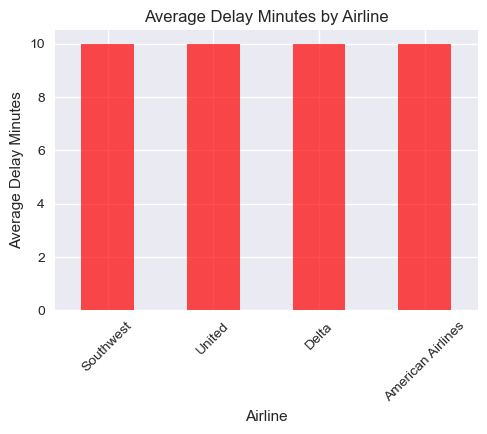

In [38]:

fig.suptitle('WEEK 4: Delay Analysis - Airline and Weather', fontsize=16, fontweight='bold')

# 7. Average Delay by Airline
plt.subplot(2, 2, 1)
delay_by_airline = df.groupby('Airline')['DelayMinutes'].mean().sort_values(ascending=False)
delay_by_airline.plot(kind='bar', color='red', alpha=0.7)
plt.title('Average Delay Minutes by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay Minutes')
plt.xticks(rotation=45)

Text(0, 0.5, '')

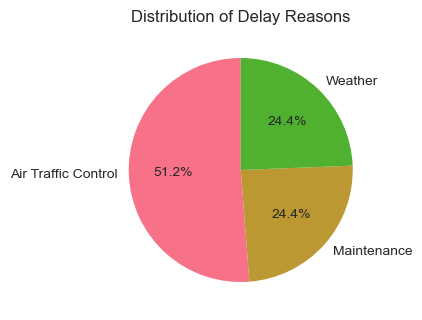

In [39]:

# 8. Delay Reasons Distribution
plt.subplot(2, 2, 2)
delay_reasons = df['DelayReason'].value_counts()
delay_reasons.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Delay Reasons')
plt.ylabel('')

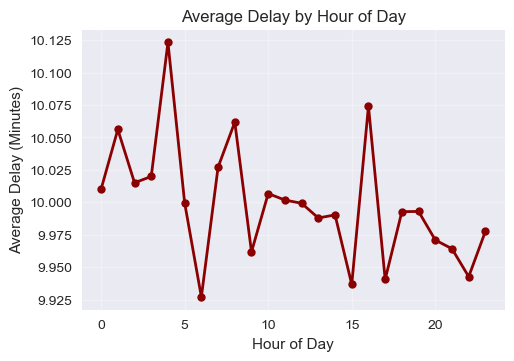

In [40]:
# 9. Delays by Time of Day
plt.subplot(2, 2, 3)
delays_by_hour = df.groupby('Hour')['DelayMinutes'].mean()
delays_by_hour.plot(kind='line', marker='o', color='darkred', linewidth=2, markersize=6)
plt.title('Average Delay by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (Minutes)')
plt.grid(True, alpha=0.3)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'JFK'),
  Text(1, 0, 'ATL'),
  Text(2, 0, 'ORD'),
  Text(3, 0, 'LAX'),
  Text(4, 0, 'DFW')])

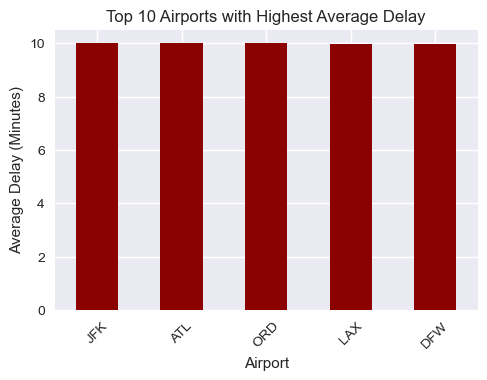

In [41]:
# 10. Delays by Airport (Origin)
plt.subplot(2, 2, 4)
delays_by_airport = df.groupby('Origin')['DelayMinutes'].mean().sort_values(ascending=False).head(10)
delays_by_airport.plot(kind='bar', color='darkred')
plt.title('Top 10 Airports with Highest Average Delay')
plt.xlabel('Airport')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(rotation=45)